In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay,precision_score, recall_score
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')
data.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
 # Shape of the dataset
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  396030
No. of columns:  27


In [4]:
 # Checking the distribution of outcome labels
data.loan_status.value_counts(normalize=True)*100


loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [5]:
# Statistical summary of the dataset
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
data['term']=data['term'].str.rsplit(' ',n= 1).str[0]

In [8]:
data['term']=data['term'].str.lstrip(' ')

In [9]:
data['term']=data['term'].astype(int)
data['emp_length']=data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5,'6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})

In [10]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

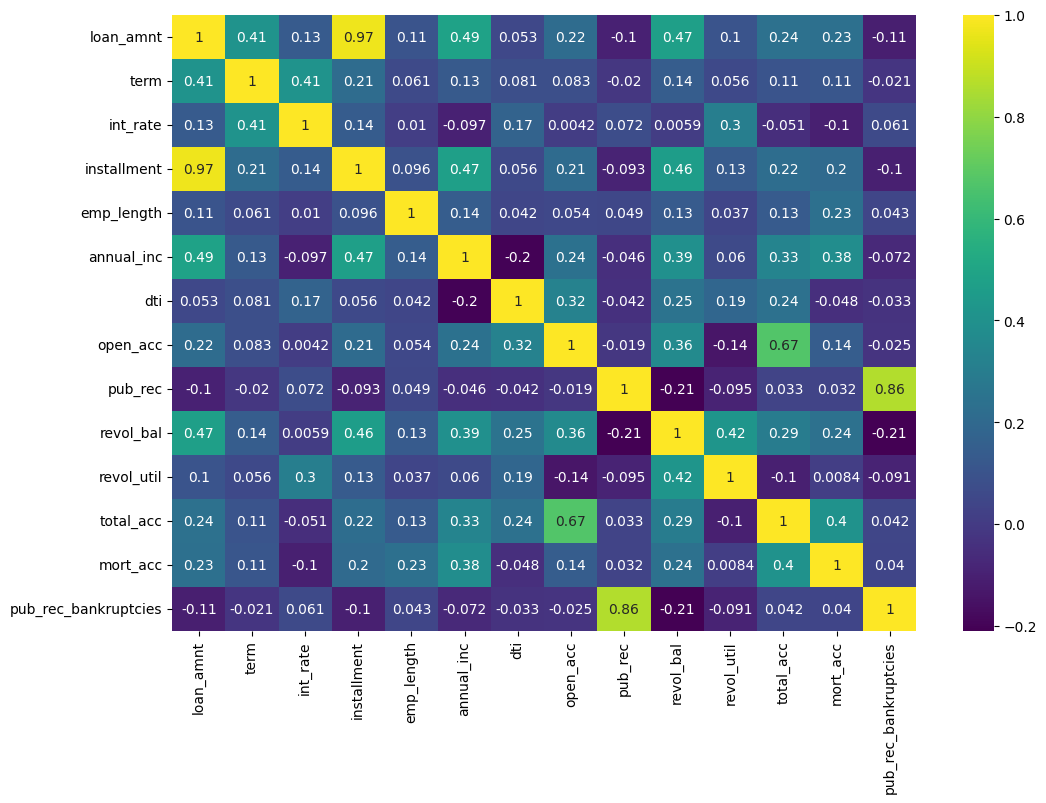

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman',numeric_only=True), annot=True, cmap='viridis')
plt.show()

# installment and loan amount, pub_rec and pub_rec_bankruptcis are highly correlated

In [12]:
data.drop(columns=['installment'], axis=1, inplace=True)
data.drop(columns=['address'], axis=1, inplace=True)


# Data set is not balanced b/t Charged Off and Fuly Paid

In [13]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [15]:
 # Checking the distribution of 'Other'
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     96
Charged Off    16
Name: count, dtype: int64

In [16]:
data['title'].value_counts()[:20]

title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: count, dtype: int64

In [17]:
data.title.value_counts()[:10]

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: count, dtype: int64

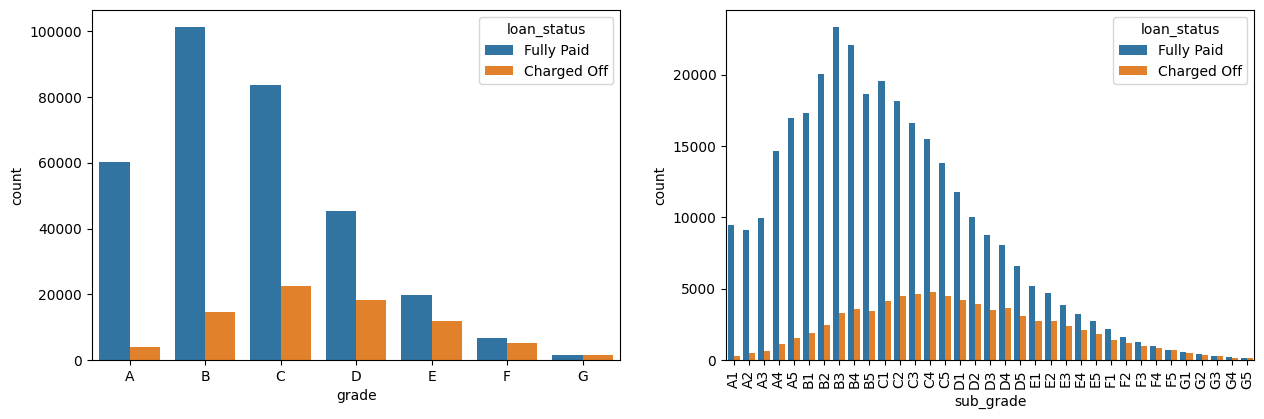

In [18]:

 fig=plt.figure(figsize=(15, 10))
 plt.subplot(2, 2, 1)
 grade= sorted(data.grade.unique().tolist())
 sns.countplot(x='grade', data=data, hue='loan_status', order=grade)
 plt.subplot(2, 2, 2)
 sub_grade = sorted(data.sub_grade.unique().tolist())
 sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
 plt.xticks( rotation=90);

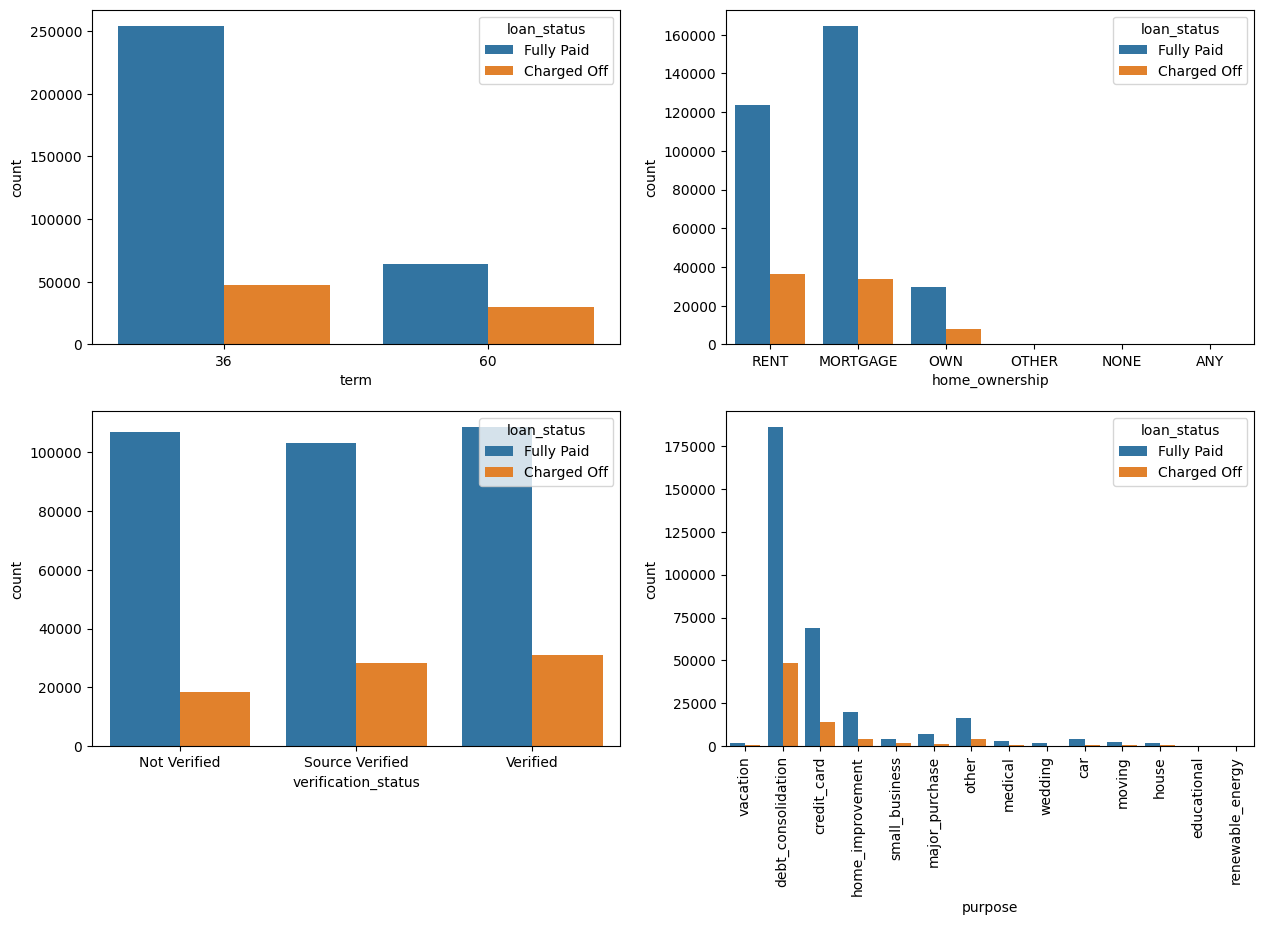

In [19]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
plt.xticks(rotation=90);

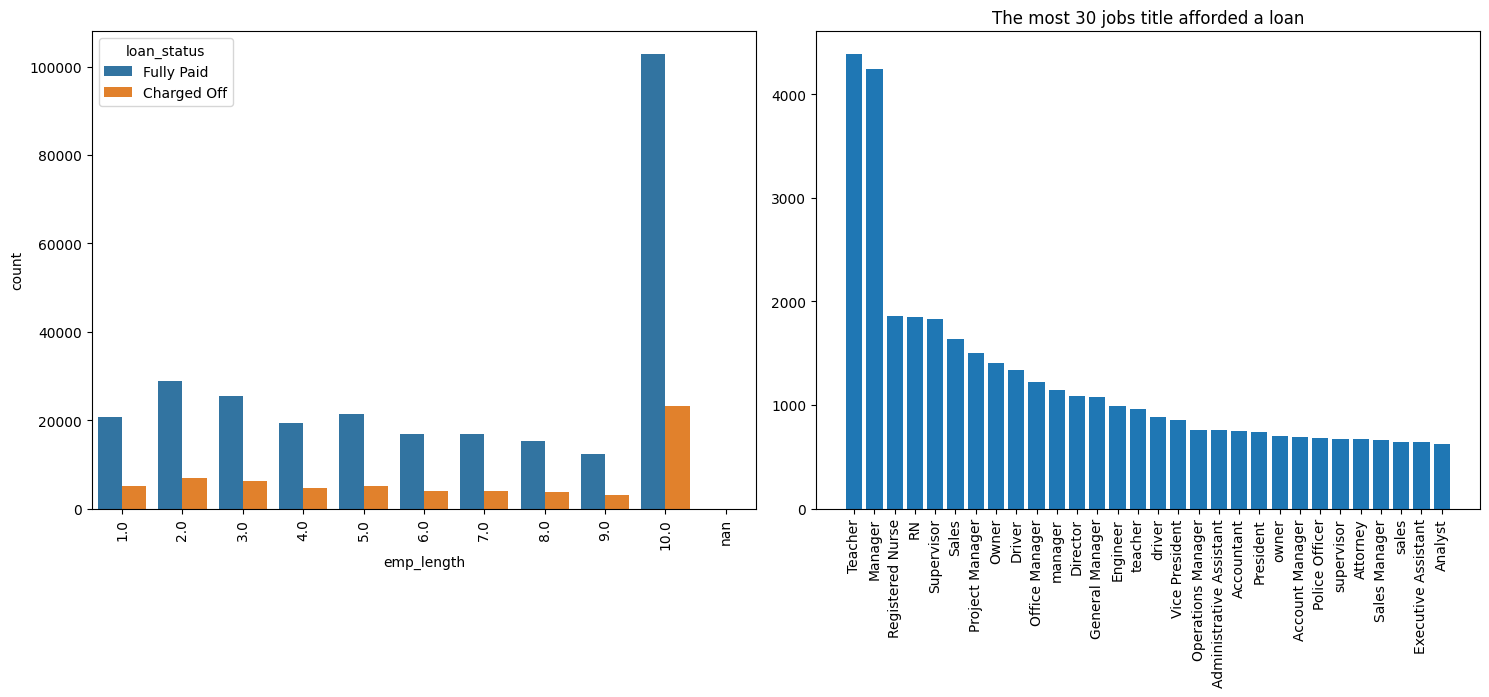

In [20]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
order = [1,2,3,4,5,6,7,8,9,10,np.nan]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
plt.xticks(rotation=90);
plt.subplot(2, 2, 2)
plt.bar(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.xticks(rotation=90)
plt.tight_layout()

**Feature Engineering**

In [21]:
def pub_rec(number):
  if number == 0.0:
    return 0
  else:
    return 1
def mort_acc(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number
def pub_rec_bankruptcies(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number

In [22]:

data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec)

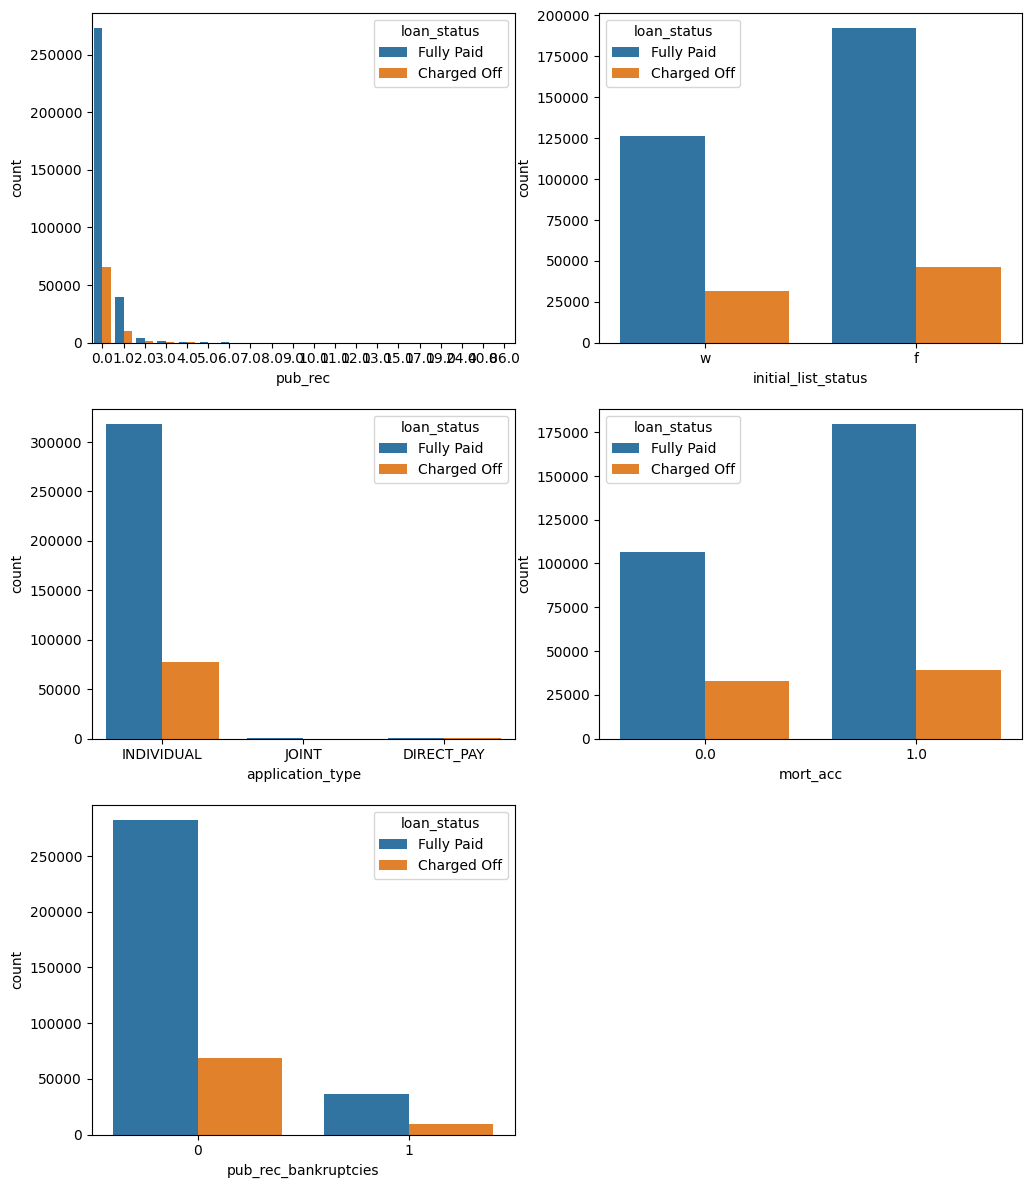

In [23]:
 plt.figure(figsize=(12, 30))
 plt.subplot(6, 2, 1)
 sns.countplot(x='pub_rec', data=data, hue='loan_status')
 plt.subplot(6, 2, 2)
 sns.countplot(x='initial_list_status', data=data, hue='loan_status')
 plt.subplot(6, 2, 3)
 sns.countplot(x='application_type', data=data, hue='loan_status')
 plt.subplot(6, 2, 4)
 sns.countplot(x='mort_acc', data=data, hue='loan_status')
 plt.subplot(6, 2, 5)
 sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')
 plt.show()

In [24]:
#maping of target variable
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [25]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.000000
dtype: float64

# Mean Imputation

In [28]:
data.dropna(inplace=True)

In [29]:
 total_acc_avg = data.groupby(by='total_acc')['mort_acc'].median()
 # Saving mean of mort_acc according to total_acc_avg

In [30]:
def fill_mort_acc(total_acc, mort_acc):

  if (np.isnan(mort_acc) or str(mort_acc)=='np.nan'):
    return total_acc_avg[total_acc].round()
  else:
    return mort_acc

In [31]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [32]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']),axis=1)

In [33]:
data.isnull().sum()/len(data)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [34]:
 # Dropping rows with null values - # do your own research
 data.dropna(inplace=True)

#Outlier Detection & Treatment

In [35]:
numerical_data = data.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

14

In [36]:
def box_plot(col):
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=data[col])
  plt.title('Boxplot')
  plt.show()
  for col in num_cols:
    box_plot(col)

In [37]:
for col in num_cols:
  mean = data[col].mean()
  std = data[col].std()
  upper_limit = mean+3*std
  lower_limit = mean-3*std
  data.shape
  data = data[(data[col]<upper_limit) & (data[col]>lower_limit)]
data.shape

(321766, 25)

#Data Preprocessing

In [38]:
# Initial List Status
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [39]:
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.replace({'w':0,'f':1})

#One-hot Encoding

In [40]:
from sklearn.preprocessing import OrdinalEncoder
label_grade = sorted(data.grade.unique())[::-1]
label_sgrade = sorted(data.sub_grade.unique())[::-1]

ord_enc = OrdinalEncoder(categories = [label_grade])
ord_enc1 = OrdinalEncoder(categories = [label_sgrade])
ord_enc.fit(data[['grade']])
ord_enc1.fit(data[['sub_grade']])
data['grade'] = ord_enc.transform(data[['grade']])
data['sub_grade'] = ord_enc1.transform(data[['sub_grade']])

In [41]:
dummies = [ 'verification_status', 'application_type','purpose']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [42]:
data

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,5.0,26.0,Marketing,10.0,RENT,117000.0,Jan-2015,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,5.0,25.0,Credit analyst,4.0,MORTGAGE,65000.0,Jan-2015,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,5.0,27.0,Statistician,0.0,RENT,43057.0,Jan-2015,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,6.0,33.0,Client Advocate,6.0,RENT,54000.0,Nov-2014,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,4.0,20.0,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Apr-2013,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,5.0,26.0,Michael's Arts & Crafts,5.0,RENT,64000.0,Mar-2013,...,False,False,False,False,False,False,False,False,False,False
396025,10000.0,60,10.99,5.0,26.0,licensed bankere,2.0,RENT,40000.0,Oct-2015,...,False,False,False,False,False,False,False,False,False,False
396026,21000.0,36,12.29,4.0,24.0,Agent,5.0,MORTGAGE,110000.0,Feb-2015,...,False,False,False,False,False,False,False,False,False,False
396027,5000.0,36,9.99,5.0,29.0,City Carrier,10.0,RENT,56500.0,Oct-2013,...,False,False,False,False,False,False,False,False,False,False


In [43]:
data.shape

(321766, 38)

In [44]:
# Dropping some variables which IMO we can let go for now
data.drop(columns=['issue_d', 'emp_title', 'title', 'earliest_cr_line','home_ownership'], axis=1, inplace=True)
 #target encoding - freqency mapping
 #a -

#Data Preparation for Modeling

In [45]:
 X = data.drop('loan_status', axis=1)
 y = data['loan_status']
from imblearn.over_sampling import SMOTE
SmoteBL = SMOTE(k_neighbors=5)
X_smote , y_smote = SmoteBL.fit_resample(X,y)

In [46]:
X_smote.shape

(516214, 32)

In [47]:
y_smote.shape

(516214,)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,
                                            stratify=y_smote, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
data

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,loan_status,dti,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,5.0,26.0,10.0,117000.0,0,26.24,16.0,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,5.0,25.0,4.0,65000.0,0,22.05,17.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,5.0,27.0,0.0,43057.0,0,12.79,13.0,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,6.0,33.0,6.0,54000.0,0,2.60,6.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,4.0,20.0,9.0,55000.0,1,33.95,13.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,5.0,26.0,5.0,64000.0,0,10.81,7.0,...,False,False,False,False,False,False,False,False,False,False
396025,10000.0,60,10.99,5.0,26.0,2.0,40000.0,0,15.63,6.0,...,False,False,False,False,False,False,False,False,False,False
396026,21000.0,36,12.29,4.0,24.0,5.0,110000.0,0,21.45,6.0,...,False,False,False,False,False,False,False,False,False,False
396027,5000.0,36,9.99,5.0,29.0,10.0,56500.0,0,17.56,15.0,...,False,False,False,False,False,False,False,False,False,False


#Logistic Regression

In [52]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 78.84480030994737


In [55]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[65189 12244]
 [20518 56914]]


Classification Report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     77433
           1       0.82      0.74      0.78     77432

    accuracy                           0.79    154865
   macro avg       0.79      0.79      0.79    154865
weighted avg       0.79      0.79      0.79    154865



In [57]:
print(f'Precision Score:',precision_score(y_test ,y_pred))
print(f'Recall Score:',recall_score(y_test ,y_pred))

Precision Score: 0.8229561294427253
Recall Score: 0.7350191135447877


In [58]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [59]:
y_pred = tree_clf.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.61     77433
           1       0.64      0.88      0.74     77432

    accuracy                           0.69    154865
   macro avg       0.72      0.69      0.67    154865
weighted avg       0.72      0.69      0.67    154865

